# 릿지(alpha=0.1)로 선택한 변수로 돌린 모델(ver3.1) 변수 28개

'생년', '월 평균 총가구소득', '키(센티)', '몸무게(kg)', '지난 2주간 아팠던 날수', '가구 유형', '가장 불편한부위', '장애주된 원인',  
'질병명', '주된 진단명',  '건강보험가입여부 및 형태', '사고발생내용2',  '희귀난치성질환 등록 여부',  '암 종류1', '암 종류2',  
'언어치료-이용여부', '놀이치료-이용여부', '심리행동치료-이용여부',  'ADL-음식물 넘기기', 'ADL-옮겨앉기',  
'ADL-배변', 'ADL-빨래하기', 'ADL-약 챙겨먹기',  '현재 일상생활 도와주는 이유무',  
'주로 도와주는 사람', '팔받침대-사용', '의사소통 보조기기-필요', '이동식 전동리프트-필요'

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import SVC
import pickle
import os
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df=pd.read_excel("data/지체장애_고혈압_결측치 대체_데이터.xlsx")
df.head()

,id,생년,장애등록 연도,본인을 포함한 총 가구원수,본인을 포함한 총 장애인수,월 평균 총가구소득,가구 월평균 지출액,장애발생시 연령,월 혈압약 일수,관절통증 정도,...,인공호흡기-소지,인공호흡기-사용,사용빈도,1일 이용시간,이용경험-상담과 평가,휴대폰 사용 여부,스마트폰 사용 여부,컴퓨터 사용 여부,인터넷 사용 여부,01)만성질환명(고혈압)
0,1,1970,2008,3,1,280,250,38,0,0,...,2,0,0,0,2,2,1,1,1,0
1,2,1949,2010,3,1,180,150,20,30,0,...,2,0,0,0,2,1,2,2,2,1
2,4,1958,2011,2,1,350,200,51,0,0,...,2,0,0,0,2,2,1,2,2,0
3,5,1955,2009,3,2,154,154,53,30,0,...,2,0,1,3,2,2,1,2,2,1
4,6,1936,2010,2,1,275,270,62,0,7,...,2,0,2,9,1,1,2,2,2,0


In [3]:
df.columns

Index(['id', '생년', '장애등록 연도', '본인을 포함한 총 가구원수', '본인을 포함한 총 장애인수', '월 평균 총가구소득',
       '가구 월평균 지출액', '장애발생시 연령', '월 혈압약 일수', '관절통증 정도',
       ...
       '인공호흡기-소지', '인공호흡기-사용', '사용빈도', '1일 이용시간', '이용경험-상담과 평가', '휴대폰 사용 여부',
       '스마트폰 사용 여부', '컴퓨터 사용 여부', '인터넷 사용 여부', '01)만성질환명(고혈압)'],
      dtype='object', length=267)

In [4]:
df1=df[['생년', '월 평균 총가구소득', '키(센티)', '몸무게(kg)', '지난 2주간 아팠던 날수', '가구 유형', '가장 불편한부위', '장애주된 원인', 
'질병명', '주된 진단명',  '건강보험가입여부 및 형태', '사고발생내용2',  '희귀난치성질환 등록 여부',  '암 종류1', '암 종류2', 
'언어치료-이용여부', '놀이치료-이용여부', '심리행동치료-이용여부',  'ADL-음식물 넘기기', 'ADL-옮겨앉기', 
'ADL-배변', 'ADL-빨래하기', 'ADL-약 챙겨먹기',  '현재 일상생활 도와주는 이유무', 
'주로 도와주는 사람', '팔받침대-사용', '의사소통 보조기기-필요', '이동식 전동리프트-필요','01)만성질환명(고혈압)']]
df1 #2686건

,생년,월 평균 총가구소득,키(센티),몸무게(kg),지난 2주간 아팠던 날수,가구 유형,가장 불편한부위,장애주된 원인,질병명,주된 진단명,...,ADL-옮겨앉기,ADL-배변,ADL-빨래하기,ADL-약 챙겨먹기,현재 일상생활 도와주는 이유무,주로 도와주는 사람,팔받침대-사용,의사소통 보조기기-필요,이동식 전동리프트-필요,01)만성질환명(고혈압)
0,1970,280,178.0,77.0,14,21,36,64,0,12,...,1,1,1,1,0,0,0,2,2,0
1,1949,180,163.0,55.0,14,21,14,69,0,8,...,1,1,2,1,1,1,0,2,2,1
2,1958,350,158.0,63.0,14,11,38,48,175,11,...,1,1,1,1,0,0,0,2,2,0
3,1955,154,163.0,62.0,14,29,38,48,175,11,...,1,1,1,1,0,0,0,2,2,1
4,1936,275,154.0,57.0,14,24,36,48,171,6,...,3,3,4,2,1,13,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,1935,100,157.0,65.0,14,11,36,68,0,12,...,1,1,2,1,1,1,0,2,2,0
2682,1952,100,165.0,62.0,0,11,38,69,0,12,...,1,1,1,1,0,0,0,2,2,0
2683,1960,223,173.0,88.0,14,11,38,48,175,11,...,1,1,1,1,0,0,0,2,2,1
2684,1960,205,153.0,51.0,14,11,31,48,175,11,...,1,1,1,1,0,0,0,2,2,0


### 결측치가 없는 관측치 하나 미리 빼놓기 (테스트용)

In [5]:
df1[df1['01)만성질환명(고혈압)']==1]

,생년,월 평균 총가구소득,키(센티),몸무게(kg),지난 2주간 아팠던 날수,가구 유형,가장 불편한부위,장애주된 원인,질병명,주된 진단명,...,ADL-옮겨앉기,ADL-배변,ADL-빨래하기,ADL-약 챙겨먹기,현재 일상생활 도와주는 이유무,주로 도와주는 사람,팔받침대-사용,의사소통 보조기기-필요,이동식 전동리프트-필요,01)만성질환명(고혈압)
1,1949,180,163.0,55.0,14,21,14,69,0,8,...,1,1,2,1,1,1,0,2,2,1
3,1955,154,163.0,62.0,14,29,38,48,175,11,...,1,1,1,1,0,0,0,2,2,1
5,1938,160,155.0,60.0,14,11,38,63,0,12,...,1,1,2,1,1,14,0,2,2,1
6,1943,600,145.0,45.0,14,32,14,69,0,8,...,1,1,2,1,1,3,0,2,2,1
7,1945,270,155.0,70.0,14,11,36,48,171,6,...,1,1,2,1,2,0,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,1951,225,167.0,59.0,14,11,36,48,171,6,...,1,1,1,1,0,0,0,2,2,1
2679,1938,93,160.0,39.0,14,11,38,69,0,12,...,1,1,2,1,1,12,0,2,2,1
2680,1951,93,145.0,55.0,14,11,45,61,0,6,...,1,1,2,1,1,12,0,2,2,1
2683,1960,223,173.0,88.0,14,11,38,48,175,11,...,1,1,1,1,0,0,0,2,2,1


In [32]:
out=df1.loc[[2600]] # 고혈압 3, 32유 , 46,50무  
out

,생년,월 평균 총가구소득,키(센티),몸무게(kg),지난 2주간 아팠던 날수,가구 유형,가장 불편한부위,장애주된 원인,질병명,주된 진단명,...,ADL-옮겨앉기,ADL-배변,ADL-빨래하기,ADL-약 챙겨먹기,현재 일상생활 도와주는 이유무,주로 도와주는 사람,팔받침대-사용,의사소통 보조기기-필요,이동식 전동리프트-필요,01)만성질환명(고혈압)
2600,1942,120,152.0,65.0,14,11,36,48,171,6,...,1,1,1,1,0,0,0,2,2,1


In [33]:
df2=df1.drop(out.index).reset_index(drop=True)
df2.head()

,생년,월 평균 총가구소득,키(센티),몸무게(kg),지난 2주간 아팠던 날수,가구 유형,가장 불편한부위,장애주된 원인,질병명,주된 진단명,...,ADL-옮겨앉기,ADL-배변,ADL-빨래하기,ADL-약 챙겨먹기,현재 일상생활 도와주는 이유무,주로 도와주는 사람,팔받침대-사용,의사소통 보조기기-필요,이동식 전동리프트-필요,01)만성질환명(고혈압)
0,1970,280,178.0,77.0,14,21,36,64,0,12,...,1,1,1,1,0,0,0,2,2,0
1,1949,180,163.0,55.0,14,21,14,69,0,8,...,1,1,2,1,1,1,0,2,2,1
2,1958,350,158.0,63.0,14,11,38,48,175,11,...,1,1,1,1,0,0,0,2,2,0
3,1955,154,163.0,62.0,14,29,38,48,175,11,...,1,1,1,1,0,0,0,2,2,1
4,1936,275,154.0,57.0,14,24,36,48,171,6,...,3,3,4,2,1,13,0,2,2,0


In [34]:
y_data=df2[['01)만성질환명(고혈압)']]

In [35]:
x_data=df2.drop(['01)만성질환명(고혈압)'],axis=1)
x_data.head()

,생년,월 평균 총가구소득,키(센티),몸무게(kg),지난 2주간 아팠던 날수,가구 유형,가장 불편한부위,장애주된 원인,질병명,주된 진단명,...,ADL-음식물 넘기기,ADL-옮겨앉기,ADL-배변,ADL-빨래하기,ADL-약 챙겨먹기,현재 일상생활 도와주는 이유무,주로 도와주는 사람,팔받침대-사용,의사소통 보조기기-필요,이동식 전동리프트-필요
0,1970,280,178.0,77.0,14,21,36,64,0,12,...,1,1,1,1,1,0,0,0,2,2
1,1949,180,163.0,55.0,14,21,14,69,0,8,...,1,1,1,2,1,1,1,0,2,2
2,1958,350,158.0,63.0,14,11,38,48,175,11,...,1,1,1,1,1,0,0,0,2,2
3,1955,154,163.0,62.0,14,29,38,48,175,11,...,1,1,1,1,1,0,0,0,2,2
4,1936,275,154.0,57.0,14,24,36,48,171,6,...,1,3,3,4,2,1,13,0,2,2


In [36]:
y_data.value_counts()

01)만성질환명(고혈압)
1                1527
0                1158
dtype: int64

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

In [38]:
transformer = make_column_transformer(
        (OneHotEncoder(handle_unknown = "ignore"), ['가구 유형', '가장 불편한부위', '장애주된 원인', 
'질병명', '주된 진단명',  '건강보험가입여부 및 형태', '사고발생내용2',  '희귀난치성질환 등록 여부',  '암 종류1', '암 종류2', 
'언어치료-이용여부', '놀이치료-이용여부', '심리행동치료-이용여부',  'ADL-음식물 넘기기', 'ADL-옮겨앉기', 
'ADL-배변', 'ADL-빨래하기', 'ADL-약 챙겨먹기',  '현재 일상생활 도와주는 이유무', 
'주로 도와주는 사람', '팔받침대-사용', '의사소통 보조기기-필요', '이동식 전동리프트-필요']),
        remainder='passthrough')
transformer = make_pipeline(transformer, MaxAbsScaler())
transformer.fit(x_train)
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

In [39]:
#모델 생성

model = SVC(kernel='rbf', C=5.0, gamma=0.1, probability=True)#,class_weight=class_weight)

In [40]:
#모델 학습
model.fit(x_train, y_train)

#모델 검증
print('training data fit :', model.score(x_train, y_train)) 

print('test data fit :', model.score(x_test, y_test)) 

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


training data fit : 0.8366152208621607
test data fit : 0.6240694789081885


In [41]:
x_test=out.drop(['01)만성질환명(고혈압)'],axis=1)
x_test

,생년,월 평균 총가구소득,키(센티),몸무게(kg),지난 2주간 아팠던 날수,가구 유형,가장 불편한부위,장애주된 원인,질병명,주된 진단명,...,ADL-음식물 넘기기,ADL-옮겨앉기,ADL-배변,ADL-빨래하기,ADL-약 챙겨먹기,현재 일상생활 도와주는 이유무,주로 도와주는 사람,팔받침대-사용,의사소통 보조기기-필요,이동식 전동리프트-필요
2600,1942,120,152.0,65.0,14,11,36,48,171,6,...,1,1,1,1,1,0,0,0,2,2


In [42]:
labels = ['무', '유']

In [43]:
x_test = transformer.transform(x_test)

y_predict = model.predict(x_test)
label = labels[y_predict[0]]
y_predict = model.predict_proba(x_test)
confidence = round(y_predict[0][y_predict[0].argmax()], 4)

print(label, confidence) 

유 0.69


---
### 혼동 행렬 작성

In [44]:
x_data = df1.iloc[:,:-1]
y_data = df1.iloc[:,-1]

In [45]:
x_data.head(0)

,생년,월 평균 총가구소득,키(센티),몸무게(kg),지난 2주간 아팠던 날수,가구 유형,가장 불편한부위,장애주된 원인,질병명,주된 진단명,...,ADL-음식물 넘기기,ADL-옮겨앉기,ADL-배변,ADL-빨래하기,ADL-약 챙겨먹기,현재 일상생활 도와주는 이유무,주로 도와주는 사람,팔받침대-사용,의사소통 보조기기-필요,이동식 전동리프트-필요


In [46]:
y_data.head(0)

Series([], Name: 01)만성질환명(고혈압), dtype: int64)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

In [48]:
transformer = make_column_transformer(
        (OneHotEncoder(handle_unknown = "ignore"), ['가구 유형', '가장 불편한부위', '장애주된 원인', 
'질병명', '주된 진단명',  '건강보험가입여부 및 형태', '사고발생내용2',  '희귀난치성질환 등록 여부',  '암 종류1', '암 종류2', 
'언어치료-이용여부', '놀이치료-이용여부', '심리행동치료-이용여부',  'ADL-음식물 넘기기', 'ADL-옮겨앉기', 
'ADL-배변', 'ADL-빨래하기', 'ADL-약 챙겨먹기',  '현재 일상생활 도와주는 이유무', 
'주로 도와주는 사람', '팔받침대-사용', '의사소통 보조기기-필요', '이동식 전동리프트-필요']),
        remainder='passthrough')
transformer = make_pipeline(transformer, MaxAbsScaler())
transformer.fit(x_train)
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

In [49]:
#모델 생성
model = SVC(kernel='rbf', C=5.0, gamma=0.1, probability=True)#,class_weight=class_weight)

#모델 학습
model.fit(x_train, y_train)

#모델 검증
print('training data fit :', model.score(x_train, y_train)) 
print('test data fit :', model.score(x_test, y_test)) 

# 예측값 도출
y_pred = model.predict(x_test)

training data fit : 0.8377659574468085
test data fit : 0.6178660049627791


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    F1_score = f1_score(y_test, pred)
    print('Confusion Matrix')
    print(confusion)
    print('정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, F1-score: {:.4f}'.format(accuracy, precision, recall, F1_score))

# 혼동행렬 도출
get_clf_eval(y_test, y_pred)

Confusion Matrix
[[123 227]
 [ 81 375]]
정확도: 0.6179, 정밀도: 0.6229, 재현율: 0.8224, F1-score: 0.7089


[혼동 행렬 참고](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)

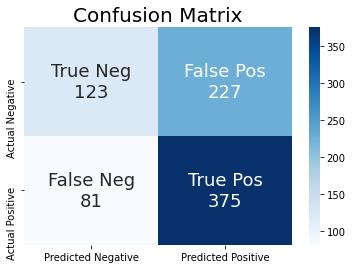

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
confusion = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in confusion.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]

labels = np.asarray(labels).reshape(2,2)

xticklabels = ['Predicted Negative', 'Predicted Positive']
yticklabels = ['Actual Negative', 'Actual Positive']

sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 18},
           xticklabels = xticklabels, yticklabels=yticklabels)
plt.title('Confusion Matrix', fontsize = 20)
plt.savefig('visual/ver3.1 혼동행렬.png')
plt.show()

TN는 예측값을 Negative로 예측, 실제 값 역시 Negative  
FP는 예측값을 Positive로 예측, 실제 값은 Negative  
FN은 예측값을 Negative로 예측, 실제 값은 Positive  
TP는 예측값을 Positive로 예측, 실제 값 역시 Positive  